# Quick Start Guide

Here is a few quick example of all the features of QuantumBlur in action.

We begin by importing it.

In [1]:
import quantumblur as qb

## Manipulating Height Maps

The main use of quantum blurs is to manipulate height maps. These are expressed as dictionaries, with coordinates as keys are heights as values.

Here's an example, for a 256x256 pixel height map.

In [2]:
import numpy as np

def make_swirl(Lx,Ly):
    swirl = {}
    for x in range(Lx):
        for y in range(Ly):
            xx, yy = (x-Lx/2), (y-Ly/2)
            d = (xx**2 + yy**2)**0.5
            theta = np.arctan2(yy,xx)
            swirl[x,y] = (1+np.sin(d/10+3*theta))/2
    return swirl

swirl = make_swirl(256,256)

In [3]:
for (x,y) in swirl:
    pass

We can use `height2image` to make this into a monochrome image, so that we can see it.

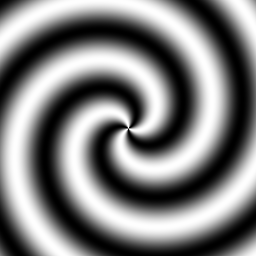

In [4]:
qb.height2image(swirl)

Nice and swirly!

Note that the `height2image` function here is just provided for convenience, so that the height maps can be visualized in places like this notebook.

Let's move on to the functions that QuantumBlur is actually all about!

The most important features are:
* Turning height maps into quantum circuits.
* Turning those circuits back into height maps.
    
We turn height maps to circuits using `height2circuit`.

In [5]:
qc = qb.height2circuit(swirl)

And then turn the circuit back into a height map using `circuit2height`.

In [6]:
new_swirl = qb.circuit2height(qc)

Let's have a look at the result.

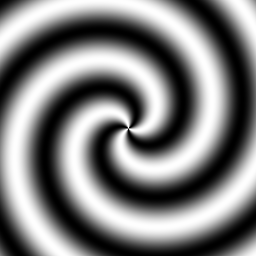

In [7]:
qb.height2image(new_swirl)

It's exactly the same. Which is good, because we didn't do anything that should have changed it.

To manipulate the image, we need to add gates to the circuit. The easiest thing to do is simply add a set of single qubit rotations. Here is a function to do just that, adding a given `fraction` of an `x` gate to all qubits of the given circuit `qc`.

In [8]:
def partial_x(qc,fraction):
    for j in range(qc.num_qubits):
        qc.rx(np.pi*fraction,j)

Let's try it out.

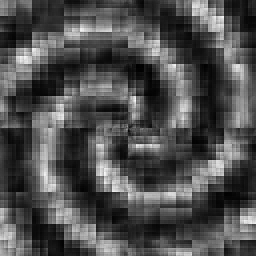

In [9]:
# create the circuit for the original image
qc = qb.height2circuit(swirl)

# do a quarter x rotation of each qubit
partial_x(qc,0.25)

# extract the new height map
rotated_swirl = qb.circuit2height(qc)

# take a look
qb.height2image(rotated_swirl)

Now it is different. Whether it is better or worse is a matter of opinion!

We can also use a logarithmic method for encoding and decoding the height maps. This is a lot more sensitive to small changes in the circuit. For example, here are the results for 1% of an `x` on each qubit.

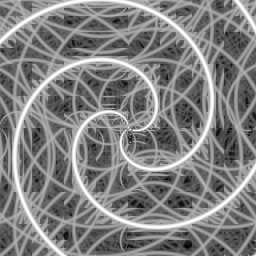

In [10]:
qc = qb.height2circuit(swirl, log=True)

partial_x(qc,0.01)

log_swirl = qb.circuit2height(qc, log=True)

qb.height2image(log_swirl)

Rather than manipulating the circuit yourself, there is also a built-in blur effect. This has rotations chosen to get a nice smooth blur. It is parameterized by a value `xi`.
* `xi=0`: No blur.
* `xi=1`: Strong blur effect, but original shapes are still recognizable.
* `xi` is on the order of the width or height of the height map: Original shapes will be washed out.

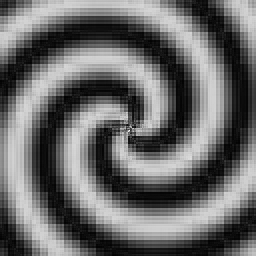

In [11]:
xi = 0.25
smooth_swirl = qb.circuit2height(qb.blur_height(swirl,xi))

qb.height2image(smooth_swirl)

Another effect we can do is to make a teleportation-like transition between two height maps, using partial versions of the swap gates.

It's a bit of a pain to put two circuits together into one bigger circuit, and then pull them apart again. So this whole process is done for the user instead and packaged up into the function `swap_heights`.

The complexity of this two circuit process scales as $O(N^2 \log N)$, where $N=L_x L_y$ is the number of points in the height map. This means it is significantly slower than the single circuit processes we've looked at so far (which had complexity $O(N \log N)$. For this reason, we'll need some smaller height maps.

Here are a couple of 8x8 ones.

In [12]:
box = {(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (1, 0): 0, (1, 1): 1, (1, 2): 1, (1, 3): 1, (1, 4): 1, (1, 5): 1, (1, 6): 1, (1, 7): 0, (2, 0): 0, (2, 1): 1, (2, 2): 0, (2, 3): 0, (2, 4): 0, (2, 5): 0, (2, 6): 1, (2, 7): 0, (3, 0): 0, (3, 1): 1, (3, 2): 0, (3, 3): 0, (3, 4): 0, (3, 5): 0, (3, 6): 1, (3, 7): 0, (4, 0): 0, (4, 1): 1, (4, 2): 0, (4, 3): 0, (4, 4): 0, (4, 5): 0, (4, 6): 1, (4, 7): 0, (5, 0): 0, (5, 1): 1, (5, 2): 0, (5, 3): 0, (5, 4): 0, (5, 5): 0, (5, 6): 1, (5, 7): 0, (6, 0): 0, (6, 1): 1, (6, 2): 1, (6, 3): 1, (6, 4): 1, (6, 5): 1, (6, 6): 1, (6, 7): 0, (7, 0): 0, (7, 1): 0, (7, 2): 0, (7, 3): 0, (7, 4): 0, (7, 5): 0, (7, 6): 0, (7, 7): 0}
plus = {(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 1, (1, 4): 1, (1, 5): 0, (1, 6): 0, (1, 7): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0, (2, 3): 1, (2, 4): 1, (2, 5): 0, (2, 6): 0, (2, 7): 0, (3, 0): 0, (3, 1): 1, (3, 2): 1, (3, 3): 1, (3, 4): 1, (3, 5): 1, (3, 6): 1, (3, 7): 0, (4, 0): 0, (4, 1): 1, (4, 2): 1, (4, 3): 1, (4, 4): 1, (4, 5): 1, (4, 6): 1, (4, 7): 0, (5, 0): 0, (5, 1): 0, (5, 2): 0, (5, 3): 1, (5, 4): 1, (5, 5): 0, (5, 6): 0, (5, 7): 0, (6, 0): 0, (6, 1): 0, (6, 2): 0, (6, 3): 1, (6, 4): 1, (6, 5): 0, (6, 6): 0, (6, 7): 0, (7, 0): 0, (7, 1): 0, (7, 2): 0, (7, 3): 0, (7, 4): 0, (7, 5): 0, (7, 6): 0, (7, 7): 0}

One is a square.

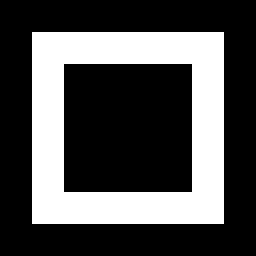

In [13]:
qb.height2image(box).resize((256,256),4)

The other is a plus (or the flag of Switzerland).

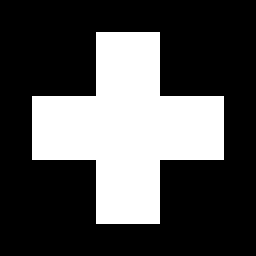

In [14]:
qb.height2image(plus).resize((256,256),4)

To implement the transition effect we call `swap_heights` with these two height maps as arguments, as well as the fraction of the swap we want to see. Let's go for a quarter.

In [15]:
new_box, new_plus = qb.swap_heights(box, plus, 0.333)

The returned height map `new_box` is a square on the way to becoming a plus.

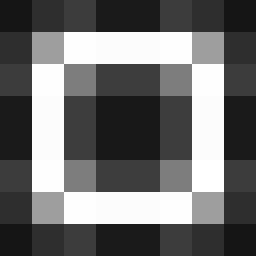

In [16]:
qb.height2image(new_box).resize((256,256),4)

And `new_plus` is a plus on the way to becoming a square.

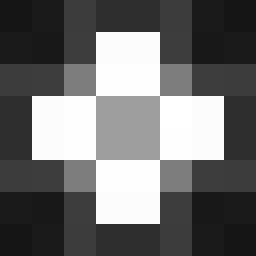

In [17]:
qb.height2image(new_plus).resize((256,256),4)

A logarithmic encoding is a bit to sensitive in this case, but a logarithmic decoding can still be used.

In [18]:
swapped_box, swapped_plus = qb.swap_heights(box, plus, 0.333, log=True)

Here's the `swapped_plus` from this, as an example.

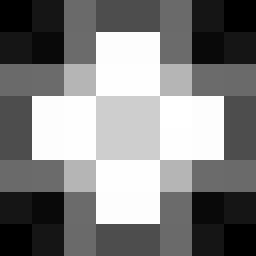

In [19]:
qb.height2image(swapped_plus).resize((256,256),4)

## Manipulating Images

All these tools can also be applied to RGB images. For these, the image is treated as three height maps: one for each colour channel.

Note that the need to normalize and unnormalize while converting to and from quantum states means that the maximum and minimum values for a color channel can change. This is also true of the height maps that we've already seen. However, it is more of a problem in images because it means that the relative values of colour channels will change.

For example, here is a royal blue swirl (made with lots of blue, half as much green and half again of red).

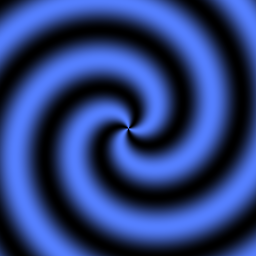

In [20]:
from PIL.Image import new as newimage, Image

Lx, Ly = 256, 256
blue_swirl = newimage('RGB',(Lx,Ly))
for (x,y) in swirl:
    h = swirl[x,y]
    blue_swirl.putpixel((x,y),(int(255*h/3), int(255*h/2), int(255*h)))
    
blue_swirl

To encode this as a list of three circuits we use `image2circuits`. To turn those back into an image, use `circuits2image`.

In [21]:
qcs = qb.image2circuits(blue_swirl)

new_blue_swirl = qb.circuits2image(qcs)

Now let's take a look at the results.

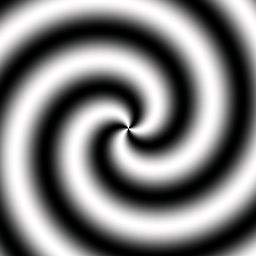

In [22]:
new_blue_swirl

This has become a white swirl. This is because each colour channel has been renormalized, which has made their relative strengths equal.

For this reason, it is best to use images for which each colour channel has a mixture of very high (255 or close to it) and very low (close to 0) values.

Here is an example of such an image.

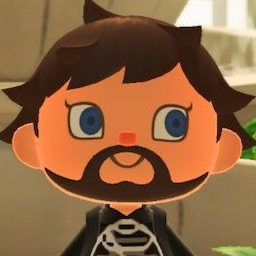

In [23]:
from PIL import Image

ac = Image.open('ac.png')

ac

Now if we encode this in a list of circuits and then turn it back into an image, it comes back looking the same.

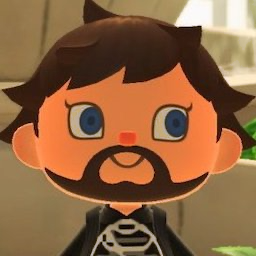

In [24]:
qcs = qb.image2circuits(ac)
new_ac = qb.circuits2image(qcs)

new_ac

The same is true for a logarithmic encoding.

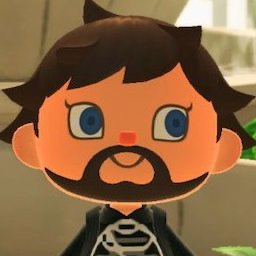

In [25]:
qcs = qb.image2circuits(ac,log=True)
new_ac = qb.circuits2image(qcs,log=True)

new_ac

Now we have mastered doing nothing to an image, let's do something. Like some classic partial `x` gates. Firstly, a quarter `x` with the standard encoding.

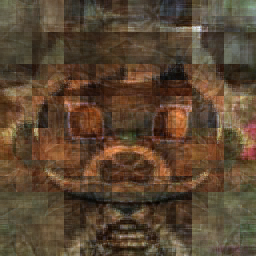

In [26]:
qcs = qb.image2circuits(ac)

for qc in qcs:
    partial_x(qc,0.2)

rotated_ac = qb.circuits2image(qcs)

rotated_ac

Now a 1% `x` with the logarithmic encoding.

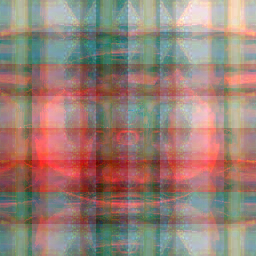

In [27]:
qcs = qb.image2circuits(ac, log=True)

for qc in qcs:
    partial_x(qc,0.01)

log_ac = qb.circuits2image(qcs, log=True)

log_ac

The built-in blur effect can also be used with images.

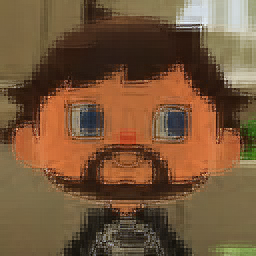

In [28]:
xi = 0.25
smooth_ac = qb.circuits2image(qb.blur_image(ac,xi))

smooth_ac

The teleportation effect can also be applied to images using `swap_images`. It applied the swap effect separately to each colour channel.

Since the complexity of this operation makes it so slow, `row_swap_images` is supplied as an alternative. This applies the teleportation process separately to each row, with a complexity of $O(L_y L_x^2 \log L_x)$

For an $L \times L$ image, this is $O(L^3 \log L)$, compared to the $O(L^4 \log L)$ complexity of `swap_images`. So still not great, but much better.

To test it out quickly, we'll downsample to $64 \times 64$.

In [29]:
small_ac = ac.resize((64,64),4)
small_rotated_ac = rotated_ac.resize((64,64),4)
swapped_ac, swapped_rotated_ac = qb.row_swap_images(small_ac, small_rotated_ac, 0.333)

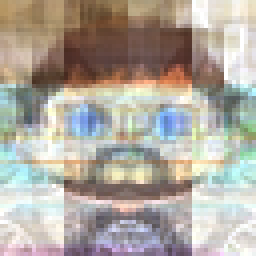

In [30]:
swapped_ac.resize((256,256),4)

## The Hidden Underbelly

### Beyond height maps and images

All these tools are based on a way of encoding height maps into images. If you want to know more about how it's done, check out the paper [here](https://arxiv.org/abs/2007.11510).

The encoding can be adapted for other types of information. It's been applied to [music](https://soundcloud.com/james-wootton-348392631/quantum-twinkle-twinkle) and even [Mario levels](https://twitter.com/decodoku/status/1211709010446929923).

As you'll learn in the paper, at the heart of any encoding is the function `make_line`. This creates a list of bit string, such they are all unique and consecutive strings differ on only one bit. This allows a set of neighouring points in whatever structure you are encoding to be encoded in bit strings that are neighbours on the Hamming graph.

As an example of this function in use, here are the bit strings that could be used to encode a list of 8 elements.

In [31]:
qb.make_line(8)

['000', '100', '110', '010', '011', '111', '101', '001']

### Running on alternative backends


#### For single height maps

The process of running a quantum circuit (via simulation) is done for you in `quantumblur`. However, you may want to do this yourself, either to run it on a faster simulator of even use a real quantum device.

An important tool when doing this is the `probs2height` function. For a given circuit and the corresponding probabilities from running it, it decodes this into a height map.

Here's an example using the 'plus' height map.

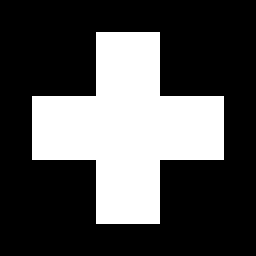

In [32]:
# create the circuit encoding the plus
qc = qb.height2circuit(plus)

# run it and get the probabilities in whatever way you choose
# just make sure they end up in this format
probs = {'010010': 0.049999999999999996, '010011': 0.049999999999999996, '010100': 0.049999999999999996, '010101': 0.049999999999999996, '010110': 0.049999999999999996, '010111': 0.049999999999999996, '011010': 0.049999999999999996, '011011': 0.049999999999999996, '011100': 0.049999999999999996, '011101': 0.049999999999999996, '011110': 0.049999999999999996, '011111': 0.049999999999999996, '100010': 0.049999999999999996, '100011': 0.049999999999999996, '101010': 0.049999999999999996, '101011': 0.049999999999999996, '110010': 0.049999999999999996, '110011': 0.049999999999999996, '111010': 0.049999999999999996, '111011': 0.049999999999999996}

# recreate the height map
new_plus = qb.probs2height(probs)
# and show it
qb.height2image(new_plus).resize((256,256),4)

Note that the size of the image is inferred from the number of qubits, assuming that the image is square. This default behaviour can be avoided by supplying the size of the image when calling `probs2height`.

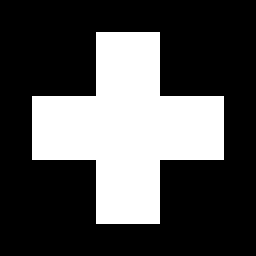

In [33]:
new_plus = qb.probs2height(probs, size=eval(qc.name))
qb.height2image(new_plus).resize((256,256),4)

Here we used the fact that the size of the image stored in a circuit is used as the name of the circuit.

Another important point to note is that the circuits produced by `quantum_blur` do not include measurement gates. This does not pose any problem if you are using a backend that does not require measurement gates (such as `Statevector` or `DensityMatrix` simulation).

To run on a real quantum device or emulation thereof (using a qasm simulator) measurement operations will need to be added. This can be done with a single command.

In [34]:
qc.measure_all()

The next step is to run it. Here's how to do that using the qasm simulator of Qiskit Aer.

In [35]:
from qiskit import execute, Aer

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts()

The output here is a counts dictionary, which takes largely the same form as a dictionary of probabilities. The only difference is that the values are the integer number of shots for which each outcome occurred.

Since probabilities can be statistically estimated from the counts, we can think of the counts dictionary as essentially an unnormalized probability dictionary. Since `probs2height` does not require the probabilities it receives to be normalized, we can simply use the counts dictionary as input.

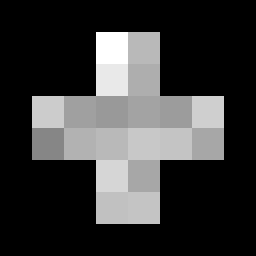

In [36]:
sampled_plus = qb.probs2height(counts)

qb.height2image(sampled_plus).resize((256,256),4)

The uneven brightness here is due to the fact that the counts dictionary represents statistically estimated probabilities, rather than the exact values. This effect will also depend on the number of shots used (less shots, more fluctuations).

#### For swapping pairs of height maps

When swapping height maps, you'll also need to use `combine_circuits` to combine the circuits for the two height maps into one.

In [37]:
circuits = [qb.height2circuit(height) for height in [box, plus]]

combined_qc = qb.combine_circuits(circuits[0], circuits[1])

Then you can apply the partial swap.

In [38]:
fraction = 0.333
qb.partialswap(combined_qc, fraction)

Next it is time to run the circuit. For example, with Aer's qasm simulator.

In [39]:
combined_qc.measure_all()

job = execute(combined_qc,Aer.get_backend('qasm_simulator'),shots=8192)
counts = job.result().get_counts()


The probabilities (or counts) you get out will be for the whole circuit, so you need to calculate the marginals with the following function.

In [40]:
marginals = qb.probs2marginals(combined_qc, counts)     

Then it is finally time to turn these probability distributions into the output height maps.

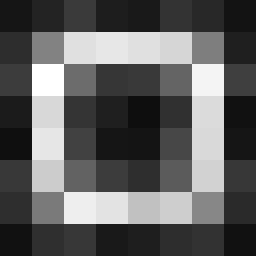

In [41]:
swapped_box = qb.probs2height(marginals[0])

qb.height2image(swapped_box).resize((256,256),4)

### Images without PIL

Finally, note that the image objects used in this notebook are from the PIL library. If you are running these tools using the standard library only, a custom image object will be used instead. This is done for compatibility reasons, to ensure that everything still works when only the standard library is used.

To create a new image, use the `newimage` function. Use `'L'` as the first argument for a monochrome image and `'RGB'` for RGB. The only difference is that pixel values are just a single integer for monochrome images (with 0 for black and 255 for white), and a tuple of three integers for RGB. The second argument is a tuple specifying the size of the image.

For example, here is a $256 \times 256$ RGB image.

In [42]:
img = newimage('RGB',(256,256))

To see what the pixel value is at a particular point, the `getpixel` method can be used. The argument is the pixel coordinate you are interested in.

In [43]:
img.getpixel((32,32))

(0, 0, 0)

Since the initialized image is blank, the pixel value is that for black. We can change that using the `putpixel` method. The arguments are the coordinate to be changed and the pixel value to change it to.

In [44]:
img.putpixel((32,32), (255,255,255))

The `show` method shows the image for the PIL version. For the custom version, it simply prints a list of coordinates and corresponding pixel values. The `resize` method resizes the image for PIL, but does absolutely nothing for the custom verion.

To get the pixel information as a dictionary, you can use the `todict` method in the custom version. This is not present in the PIL version.